# Todays topic we are going to cover is the library EacyOCR
# Lets start with the content which we will cover in this topic

* ! Setting up the require libraries for OCR
* ! Extracting text from images
* ! Dipsly the final result as follow


******************************************************************

* Here we are going to detect text from images using easyocr and python 
* Finaly visualize it by means of opencv

In [1]:
# Install the EasyOCR library
!pip install EasyOCR

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
import easyocr

In [3]:
ocr_image ='../input/optical-character-recognition/ocr_1.png'

In [4]:
read_image = easyocr.Reader(['en'],gpu=False)
read_text = read_image.readtext(ocr_image)
read_text
# here we can see the text easyocr it is reading through images.....first line represent the 
# location of text, second line indicate 'Text' present in the image 
# The third line indicates the percentage of confidence present in the image

[([[36, 28], [238, 28], [238, 54], [36, 54]],
  'Ensure High Contrast',
  0.9841786356340675),
 ([[34, 54], [236, 54], [236, 82], [34, 82]],
  'for Text Over Images',
  0.6805661525774825),
 ([[37, 89], [81, 89], [81, 101], [37, 101]], 'Text that', 0.7770358856539554),
 ([[91, 91], [191, 91], [191, 103], [91, 103]],
  'not purely decorative',
  0.9371903649554536),
 ([[204, 92], [226, 92], [226, 100], [204, 100]], 'Dont', 0.1852346592222641),
 ([[37, 103], [141, 103], [141, 117], [37, 117]],
  'of @ logo should have',
  0.6588337840949751),
 ([[147, 105], [217, 105], [217, 117], [147, 117]],
  'contrast ratio',
  0.9951147680696114),
 ([[37, 117], [117, 117], [117, 131], [37, 131]],
  'of at least 4.5.1',
  0.6842736801653274),
 ([[260, 124], [298, 124], [298, 130], [260, 130]],
  'Mactol cor',
  0.018021345947693498),
 ([[273, 139], [303, 139], [303, 155], [273, 155]],
  'NNY:',
  0.2656186521053314)]

In [5]:
top_corner = tuple(read_text[0][0][0])
bottom_corner = tuple(read_text[0][0][2])
text = read_text[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

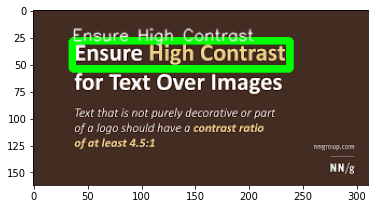

In [6]:
img = cv2.imread(ocr_image)
img = cv2.rectangle(img,top_corner,bottom_corner,(0,255,0),5)
img = cv2.putText(img,text,top_corner,font,0.5,(255,255,255),1,cv2.LINE_AA)
plt.imshow(img)
plt.show()

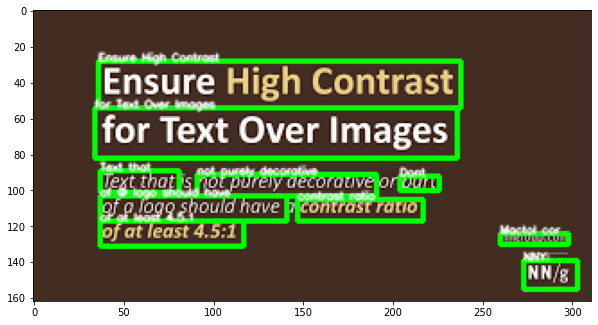

In [7]:
# Now to handle multiple line in the image let see how do we do that
img = cv2.imread(ocr_image)
for character in read_text:
    top_corner = tuple([int(x) for x in character[0][0]])
    bottom_corner = tuple([int(x) for x in character[0][2]])
    text = character[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img,top_corner,bottom_corner,(0,255,0),2)
    img = cv2.putText(img,text,top_corner,font,0.2,(255,255,255),1,cv2.LINE_AA)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()
    
    


Looks good the easyocr ...got to check other libraries and its consitency with more no of text